In [1]:
!pip install pgmpy

You are using pip version 8.1.2, however version 9.0.1 is available.
You should consider upgrading via the 'pip install --upgrade pip' command.


**Exercise 1 (20 points)**

 - Download the 'insurance' network file from the bnlearn repo: 
    http://www.bnlearn.com/bnrepository/insurance/insurance.bif.gz

    You'll need to decompress the file and then use the BIFreader module from pgmpy to read the file in as a      BayesianNetwork instance.
    
 - Print the list of nodes and the list of edges.
 - Print the cpds for 'GoodStudent' and 'CarValue'.
 - Is 'CarValue' conditionally independent of 'Age' given 'MakeModel' (use pgmpy to find out)


In [2]:
from pgmpy.models import BayesianModel
from pgmpy.factors import TabularCPD


In [3]:
import urllib.request
import io
import gzip

## Download and decompress the file as insurance.bif

response = urllib.request.urlopen("http://www.bnlearn.com/bnrepository/insurance/insurance.bif.gz")
compressed_file = io.BytesIO(response.read())
decompressed_file = gzip.GzipFile(fileobj=compressed_file)

with open('insurance.bif', 'wb') as outfile:
    outfile.write(decompressed_file.read())

In [4]:
from pgmpy.readwrite import BIFReader
#read in .bif file using BIFReader
insurance = BIFReader("insurance.bif")
#find the model
insurance_network=insurance.get_model()

In [5]:
#Print edges
insurance.get_edges()

[['RuggedAuto', 'Cushioning'],
 ['Airbag', 'Cushioning'],
 ['Accident', 'ThisCarDam'],
 ['RuggedAuto', 'ThisCarDam'],
 ['Accident', 'MedCost'],
 ['Age', 'MedCost'],
 ['Cushioning', 'MedCost'],
 ['SocioEcon', 'MakeModel'],
 ['RiskAversion', 'MakeModel'],
 ['Accident', 'OtherCarCost'],
 ['RuggedAuto', 'OtherCarCost'],
 ['DrivingSkill', 'DrivHist'],
 ['RiskAversion', 'DrivHist'],
 ['Age', 'DrivingSkill'],
 ['SeniorTrain', 'DrivingSkill'],
 ['DrivingSkill', 'DrivQuality'],
 ['RiskAversion', 'DrivQuality'],
 ['AntiTheft', 'Theft'],
 ['HomeBase', 'Theft'],
 ['CarValue', 'Theft'],
 ['MakeModel', 'CarValue'],
 ['VehicleYear', 'CarValue'],
 ['Mileage', 'CarValue'],
 ['Antilock', 'Accident'],
 ['Mileage', 'Accident'],
 ['DrivQuality', 'Accident'],
 ['Age', 'SeniorTrain'],
 ['RiskAversion', 'SeniorTrain'],
 ['Age', 'RiskAversion'],
 ['SocioEcon', 'RiskAversion'],
 ['RiskAversion', 'HomeBase'],
 ['SocioEcon', 'HomeBase'],
 ['OtherCarCost', 'PropCost'],
 ['ThisCarCost', 'PropCost'],
 ['RiskAversion

In [6]:
#print nodes
insurance.variable_names

['GoodStudent',
 'Age',
 'SocioEcon',
 'RiskAversion',
 'VehicleYear',
 'ThisCarDam',
 'RuggedAuto',
 'Accident',
 'MakeModel',
 'DrivQuality',
 'Mileage',
 'Antilock',
 'DrivingSkill',
 'SeniorTrain',
 'ThisCarCost',
 'Theft',
 'CarValue',
 'HomeBase',
 'AntiTheft',
 'PropCost',
 'OtherCarCost',
 'OtherCar',
 'MedCost',
 'Cushioning',
 'Airbag',
 'ILiCost',
 'DrivHist']

In [7]:
#Print the cpds for 'GoodStudent'
insurance_network.get_cpds('GoodStudent')

<TabularCPD representing P(GoodStudent:2 | SocioEcon:4, Age:3) at 0x7f99d01b4dd8>

In [8]:
#Print the cpd for 'CarValue'
insurance_network.get_cpds('CarValue')

<TabularCPD representing P(CarValue:5 | MakeModel:5, VehicleYear:2, Mileage:4) at 0x7f99d01b4550>

In [23]:
#Is 'CarValue' conditionally independent of 'Age' given 'MakeModel' 
#Yes, CarValue is independent of Age given MakeModel
insurance_network.get_independencies()


(Cushioning _|_ MedCost, MakeModel, Mileage, OtherCarCost, DrivHist, DrivingSkill, Theft, CarValue, VehicleYear, Accident, SeniorTrain, HomeBase, Airbag, RiskAversion, PropCost, DrivQuality, ThisCarCost, AntiTheft, Age, GoodStudent, RuggedAuto, ILiCost, SocioEcon, Antilock, OtherCar | ThisCarDam)
(Cushioning _|_ ThisCarDam, MakeModel, Mileage, OtherCarCost, DrivHist, DrivingSkill, Theft, CarValue, VehicleYear, Accident, SeniorTrain, HomeBase, RiskAversion, Airbag, PropCost, DrivQuality, ThisCarCost, AntiTheft, Age, GoodStudent, RuggedAuto, ILiCost, SocioEcon, Antilock, OtherCar | MedCost)
(Cushioning _|_ ThisCarDam, MedCost, OtherCarCost, DrivHist, DrivingSkill, Theft, CarValue, VehicleYear, Accident, HomeBase, SeniorTrain, RiskAversion, Airbag, PropCost, DrivQuality, ThisCarCost, AntiTheft, Age, GoodStudent, RuggedAuto, ILiCost, SocioEcon, Antilock, OtherCar | MakeModel)
(Cushioning _|_ ThisCarDam, MedCost, MakeModel, Mileage, DrivHist, DrivingSkill, Theft, CarValue, VehicleYear, Acci

**Exercise 2 (40 points)**

The first cell below imports the packages that aid in visualization of graphs. The second cell provides sample code to print the entire network. It's not very pretty, so the third cell displays the network using different code (not shown). In this exercise, you will explore trails, and create a subgraph that you can illustrate using the visualization tools.

- Note that an 'immorality' is a v-structure X -> Z <- Y, if there is no edge between X and Y. Use the `get_immoralities` method, along with `is_active_trail` to find all the v-structures in the insurance model

- Create a subgraph that includes the nodes: 'Antilock','Mileage','CarValue','RuggedAuto','Accident','Airbag','Cushioning' and 'MakeModel'
- Use nx.draw to draw the subgraph.
- There are two v-structures in the subgraph. Which are they, and how can you make them active?


In [10]:
import networkx as nx
from networkx.drawing.nx_agraph import graphviz_layout
import pygraphviz as pgv

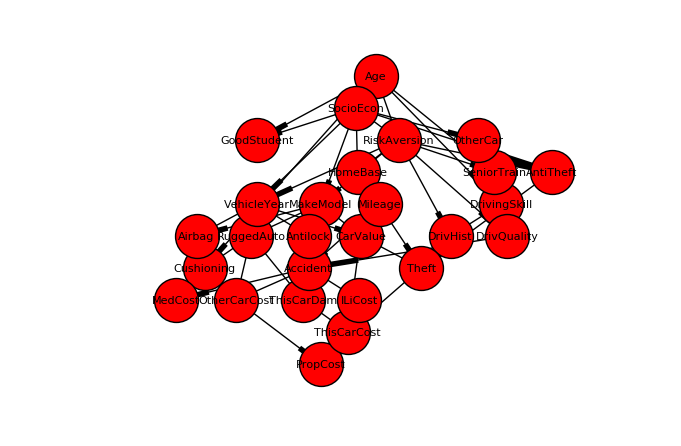

In [11]:
nx.draw(insurance_network,node_size=1000,font_size=8,with_labels='TRUE',
        pos=graphviz_layout(insurance_network,prog='dot'))

In [12]:
#find all the v-structures in the insurance model
immor_list=insurance_network.get_immoralities()
print("v-structures in the insurance model:")
for item in immor_list:
    if insurance_network.is_active_trail(item[0],item[1])==False:
        print(item)

v-structures in the insurance model:
('Mileage', 'VehicleYear')
('DrivQuality', 'Mileage')
('MakeModel', 'Mileage')
('Antilock', 'Mileage')


In [13]:
#Create a subgraph that includes the nodes:
#'Antilock','Mileage','CarValue','RuggedAuto','Accident','Airbag','Cushioning' and 'MakeModel'
sub_insurance=insurance_network.subgraph(('Antilock','Mileage','CarValue','RuggedAuto','Accident','Airbag','Cushioning','MakeModel'))

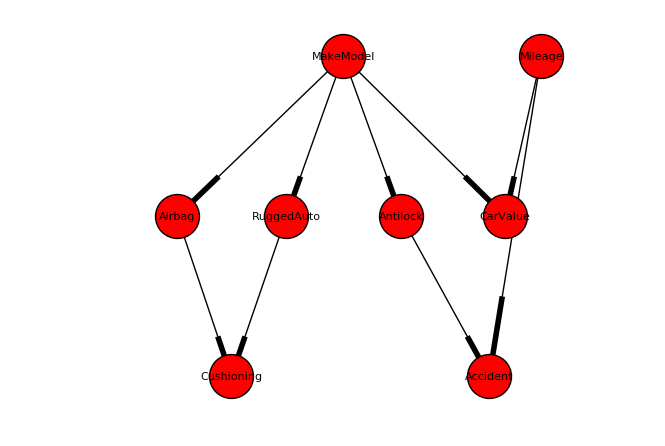

In [14]:
#Use nx.draw to draw the subgraph.
nx.draw(sub_insurance,node_size=1000,font_size=8,with_labels='TRUE',
        pos=graphviz_layout(sub_insurance,prog='dot'))

In [15]:
#There are two v-structures in the subgraph
sub_immor_list=sub_insurance.get_immoralities()
print("v-structures in the subgraph:")
for item in sub_immor_list:
    if sub_insurance.is_active_trail(item[0],item[1])==False:
        print(item)

v-structures in the subgraph:
('MakeModel', 'Mileage')
('Antilock', 'Mileage')


In [16]:
#The v-structures are above.
# Can make them active by directly linking antilock and makemodel to mileage.

Exercise 3 (40 points)

Get the cancer network from bnlearn: http://www.bnlearn.com/bnrepository/cancer/cancer.bif.gz.

- Draw this network using nx.draw
- Assuming all variables are Bernoulli, generate a random dataset of 1000 observations (as we did in class with the student model) and learn the parameters from 2/3 of that data.
- Predict the cancer variable for the remaining 1/3 of observations
- What is your out-of-sample error (mean-squared)
    
    

In [17]:
#download the file
response = urllib.request.urlopen(" http://www.bnlearn.com/bnrepository/cancer/cancer.bif.gz")
compressed_file = io.BytesIO(response.read())
decompressed_file = gzip.GzipFile(fileobj=compressed_file)

with open('cancer.bif', 'wb') as outfile:
    outfile.write(decompressed_file.read())
    
#read in .bif file using BIFReader
cancer = BIFReader("cancer.bif")
#find the model
cancer_network=cancer.get_model()   

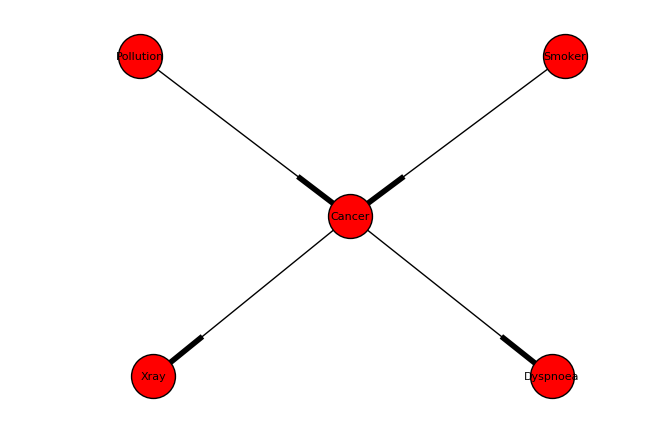

In [18]:
#Use nx.draw to draw the network.
nx.draw(cancer_network,node_size=1000,font_size=8,with_labels='TRUE',
        pos=graphviz_layout(cancer_network,prog='dot'))

In [19]:
#generate a random dataset of 1000 observations 
#Train Model from Data
import pandas as pd
import numpy as np

#generate data
raw_data = np.random.randint(low=0,high=2,size=(1000, 5))

#create training data
data = pd.DataFrame(raw_data,columns=["Pollution", "Smoker", "Cancer","Xray", "Dyspnoea"])
data_train = data[: int(data.shape[0] * 0.66)]
cancer_model = BayesianModel([("Pollution", "Cancer"),("Smoker", "Cancer"),("Cancer", "Xray"),("Cancer", "Dyspnoea")])
#fit training data 
cancer_model.fit(data_train)

In [20]:
#Predict the cancer variable for the remaining 1/3 of observations
data_test = data[int(0.66 * data.shape[0]) : data.shape[0]]

data_test.drop('Cancer', axis=1, inplace=True)

cancer_pred=cancer_model.predict(data_test)

#find mean squared error 
true_data=data[int(0.66 * data.shape[0]) : data.shape[0]]
true_data.drop(["Pollution", "Smoker","Xray", "Dyspnoea"], axis=1, inplace=True)


/opt/conda/lib/python3.5/site-packages/ipykernel/__main__.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/opt/conda/lib/python3.5/site-packages/ipykernel/__main__.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


In [21]:
print("The mean squared error is:")
np.mean((true_data-cancer_pred)**2)


The mean squared error is:


Cancer    0.479412
dtype: float64